<a href="https://colab.research.google.com/github/Aniket1200/Aniket1200/blob/main/Alipurduar%20plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
file_path = '/content/drive/MyDrive/Alipurduar plot.csv'

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

<ipython-input-72-711c5fa56db0>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Years'].astype(str) + '-' + data['Months'])


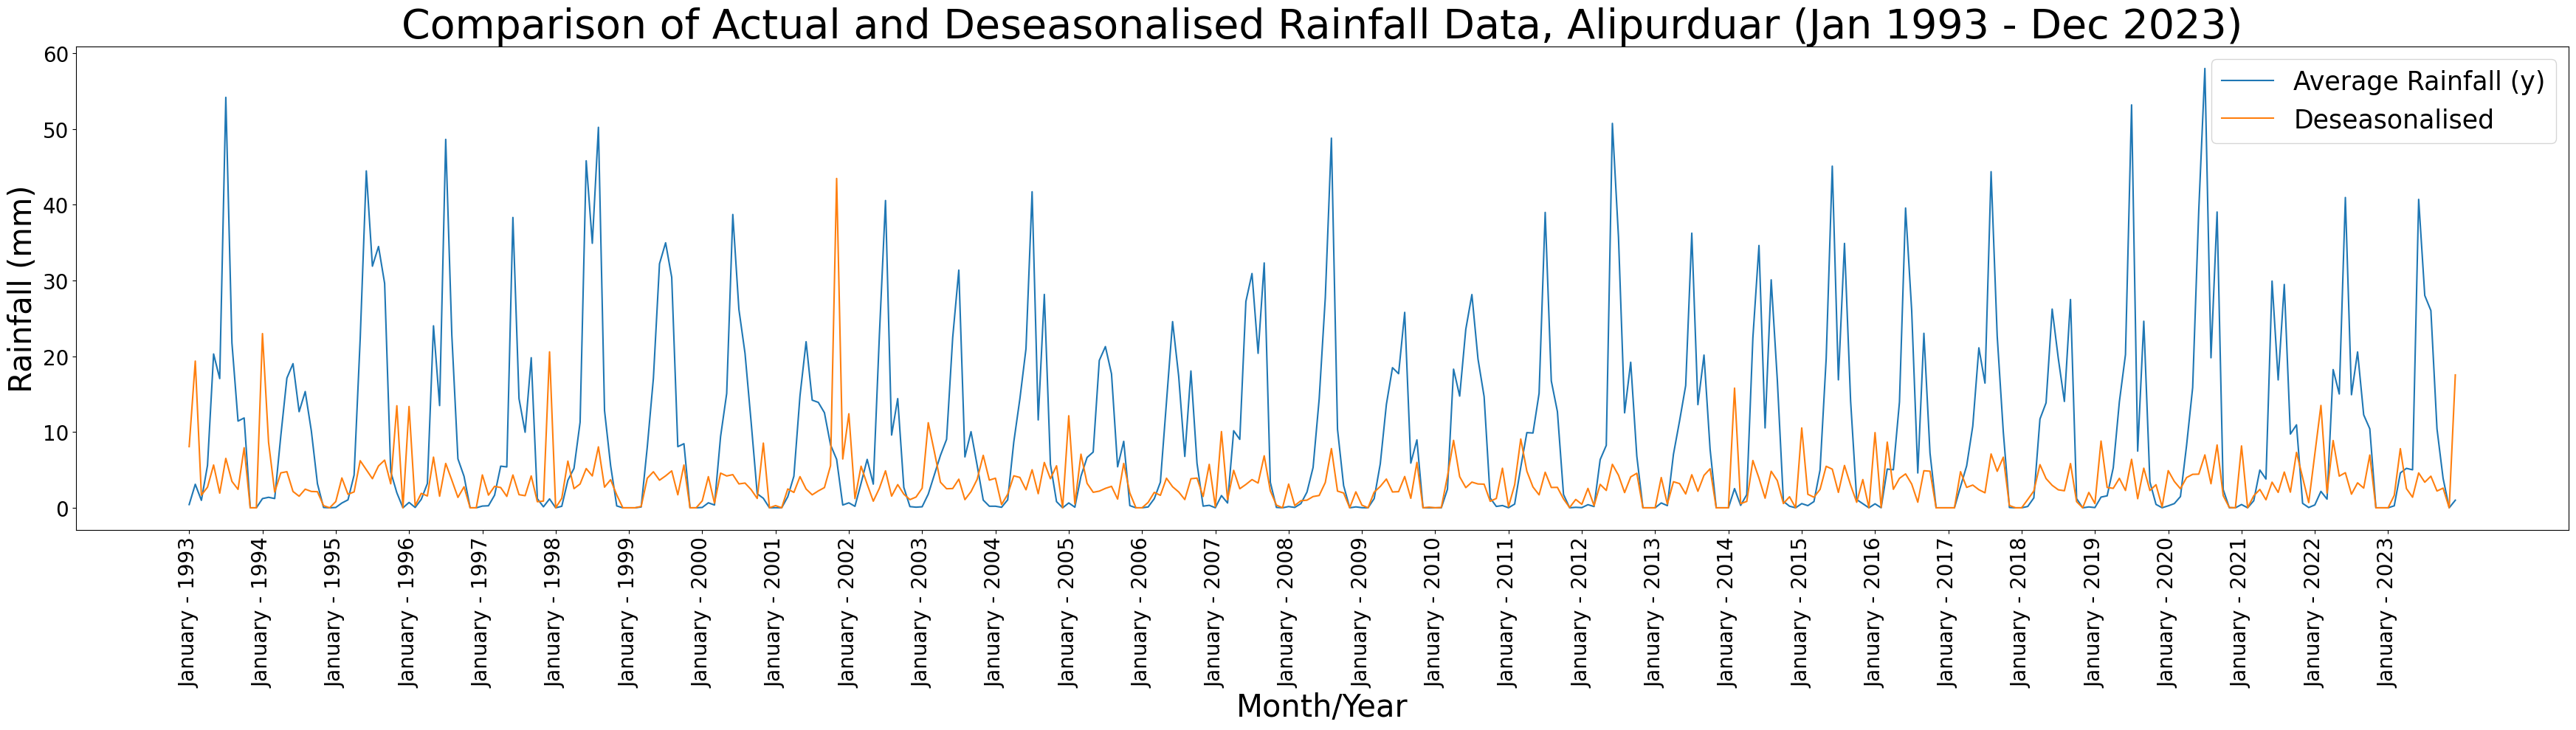

In [72]:
data = pd.read_csv(file_path)

# Select rows from 0 to 373 (inclusive)
data = data.iloc[0:373, :]

 # Assuming years are in a column named 'ColumnYear' (adjust if different)
try:
      # Attempt to create 'Date' using 'ColumnYear'
      data['Date'] = pd.to_datetime(data['Years'].astype(str) + '-' + data['Months'])
except KeyError:
      # Handle 'ColumnYear' missing
      print("Column 'Years' might be missing. Check your CSV for the actual year column name.")
      # Replace 'nan' with a valid month name (e.g., 'Jan') before creating the 'Date' column
data['Months'] = data['Months'].replace('nan', 'Jan')  # Replace 'nan' with a placeholder


dates = data['Date'].dt.month_name() + ' - ' + data['Date'].dt.year.astype(str)

    # Filter data for Jan 1993 to Dec 2023 (inclusive)
filtered_data = data.loc[(data['Date'].dt.year >= 1993) & (data['Date'].dt.year <= 2023)]
filtered_dates = filtered_data['Date'].dt.month_name() + ' - ' + filtered_data['Date'].dt.year.astype(str)
data_cols = ['Average Rainfall (y)',    'Deseasonalised']  # Your actual column names
data_values = filtered_data[data_cols].values
    # Continue with the rest of the code

plt.figure(figsize=(35, 10))  # Adjust figure size as needed

for i, col in enumerate(data_cols):
      plt.plot(filtered_dates, data_values[:, i], label=col)
plt.xlabel('Month/Year', fontsize=30)
import matplotlib.pyplot as plt

plt.ylabel('Rainfall (mm)', fontsize=30)
plt.yticks(fontsize=20)
plt.title('Comparison of Actual and Deseasonalised Rainfall Data, Alipurduar (Jan 1993 - Dec 2023)', fontsize=40)
plt.legend(data_cols, loc="upper right", fontsize=25)
plt.xticks(range(0, len(filtered_dates), 12), filtered_dates[::12], rotation=90, fontsize=20)
plt.xticks(rotation=90)  # Rotate x-axis labels for
plt.tight_layout()
plt.show()